In [60]:
names = ['Status of existing checking account',
        'Duration in month',
        'Credit history',
        'Purpose',
        'Credit amount',
        'Savings account/bonds',
        'Present employment since',
        'Installment rate in percentage of disposable income',
        'Personal status and sex',
        'Other debtors / guarantors',
        'Present residence since',
        'Property',
        'Age',
        'Other installment plans',
        'Housing',
        'Number of existing credits at this bank',
        'Job',
        'Number of people being liable to provide maintenance for',
        'Telepthone',
        'Foreign worker']

status ={
        'A11' : '... < 0 DM',
	'A12' : '0 <= ... < 200 DM',
	'A13' : '>= 200 DM',
        'A14' : 'no checking account'
}

hist = {
        'A30' : 'no credits taken/ all credits paid back duly',
        'A31' : 'all credits at this bank paid back duly',
	'A32' : 'existing credits paid back duly till now',
        'A33' : 'delay in paying off in the past',
	'A34' : 'critical account/  other credits existing (not at this bank)'
}

purpose = {
        'A40' : 'car (new)',
        'A41' : 'car (used)',
        'A42' : 'furniture/equipment',
        'A43' : 'radio/television',
        'A44' : 'domestic appliances',
        'A45' : 'repairs',
        'A46' : 'education',
        'A47' : '(vacation - does not exist?)',
        'A48' : 'retraining',
        'A49' : 'business',
        'A410' : 'others'
}

savings = {
        'A61' : '... <  100 DM',
	'A62' : '100 <= ... <  500 DM',
	'A63' : '500 <= ... < 1000 DM',
	'A64' : '.. >= 1000 DM',
        'A65' : 'unknown/ no savings account'
}

employee_since = {
        'A71' : 'unemployed',
	'A72' : '... < 1 year',
	'A73' : '1  <= ... < 4 years', 
	'A74' : '4  <= ... < 7 years',
	'A75' : '.. >= 7 years'
}

sex = {
        'A91' : 'male : divorced/separated',
	'A92' : 'female : divorced/separated/married',
        'A93' : 'male : single',
	'A94' : 'male : married/widowed',
	'A95' : 'female : single',
}

qual = {
        'A101' : 'none',
	'A102' : 'co-applicant',
	'A103' : 'guarantor'
}

prop = {
        'A121' : 'real estate',
	'A122' : 'building society savings agreement/ life insurance',
        'A123' : 'car or other, not in attribute 6',
	'A124' : 'unknown / no property'
}

plans = {
        'A141' : 'bank',
	'A142' : 'stores',
	'A143' : 'none'
}

housing = {
        'A151' : 'rent',
	'A152' : 'own',
	'A153' : 'for free'
}

job = {
        'A171' : 'unemployed/ unskilled  - non-resident',
	'A172' : 'unskilled - resident',
	'A173' : 'skilled employee / official',
	'A174' : 'management/ self-employed/ highly qualified employee/ officer'
}

tel = {
        'A191' : 'none',
	'A192' : 'yes, registered under the customers name'
}

foreign = {
        'A201' : 'yes',
	'A202' : 'no'
}

import pandas as pd
df = pd.read_csv('data/german.data', sep=' ', header=None, names=names, index_col=False)

df['Status of existing checking account'] = df['Status of existing checking account'].map(status)
df['Credit history'] = df['Credit history'].map(hist)
df['Purpose'] = df['Purpose'].map(purpose)
df['Savings account/bonds'] = df['Savings account/bonds'].map(savings)
df['Present employment since'] = df['Present employment since'].map(employee_since)
df['Personal status and sex'] = df['Personal status and sex'].map(sex)
df['Other debtors / guarantors'] = df['Other debtors / guarantors'].map(qual)
df['Property'] = df['Property'].map(prop)
df['Other installment plans'] = df['Other installment plans'].map(plans)
df['Housing'] = df['Housing'].map(housing)
df['Job'] = df['Job'].map(job)
df['Telepthone'] = df['Telepthone'].map(tel)
df['Foreign worker'] = df['Foreign worker'].map(foreign)

df[['Sex', 'Personal status']] = df['Personal status and sex'].str.split(' : ', expand=True)

df = df.drop(['Personal status and sex'], axis=1)

/var/folders/cy/g2hnkly12jddm2y_qsnwj28jlsw_2p/T/ipykernel_7118/945453174.py:118: ParserWarning:

Length of header or names does not match length of data. This leads to a loss of data with index_col=False.



In [61]:
f = (lambda x: 'no' if x == 'yes' else 'yes')
df['Foreign worker'] = df['Foreign worker'].apply(f)

In [62]:
import numpy as np
df['target'] = 0
df2 = df[df['Sex']=='male'].copy()
df2['target'] = np.random.binomial(1, 0.7, len(df[df['Sex']=='male']))
df3 = df[df['Sex']=='female'].copy()
df3['target'] = np.random.binomial(1, 0.4, len(df[df['Sex']=='female']))
df = df2._append(df3)

In [63]:
df['numeric_target'] = df.sum(numeric_only=True, axis=1)

In [64]:
threshold_man = 1500
threshold_woman = 2700

def make_cat_target(row):
    if row['Sex'] == 'male':
        if row['numeric_target'] > threshold_man:
            return 1
        else:
            return 0
    else:
        if row['numeric_target'] > threshold_woman:
            return 1
        else:
            return 0
        
df['cat_target'] = df.apply(make_cat_target, axis=1)

In [65]:
cols = df.columns
num_columns = df._get_numeric_data().columns
cat_columns = list(set(cols)-set(num_columns))

In [66]:
from sklearn.model_selection import train_test_split

y = df['cat_target']
X = df.drop(['cat_target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
from catboost import CatBoostRegressor
cols = X_train.columns
num_columns = X_train._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_columns))
model = CatBoostRegressor(iterations=100, learning_rate=0.5)
# Fit model
model.fit(X_train, y_train, cat_cols)

0:	learn: 0.2738520	total: 18.4ms	remaining: 1.82s
1:	learn: 0.1686501	total: 27.5ms	remaining: 1.35s
2:	learn: 0.1030055	total: 35.9ms	remaining: 1.16s
3:	learn: 0.0723228	total: 40.6ms	remaining: 976ms
4:	learn: 0.0580256	total: 47.9ms	remaining: 911ms
5:	learn: 0.0472180	total: 55.1ms	remaining: 864ms
6:	learn: 0.0472137	total: 57.7ms	remaining: 766ms
7:	learn: 0.0441441	total: 62.9ms	remaining: 724ms
8:	learn: 0.0416358	total: 69.2ms	remaining: 700ms
9:	learn: 0.0381705	total: 72.7ms	remaining: 654ms
10:	learn: 0.0365313	total: 76.7ms	remaining: 621ms
11:	learn: 0.0361774	total: 83.5ms	remaining: 612ms
12:	learn: 0.0358591	total: 91.2ms	remaining: 610ms
13:	learn: 0.0353209	total: 96.2ms	remaining: 591ms
14:	learn: 0.0336502	total: 100ms	remaining: 567ms
15:	learn: 0.0328570	total: 105ms	remaining: 551ms
16:	learn: 0.0324774	total: 111ms	remaining: 543ms
17:	learn: 0.0319533	total: 121ms	remaining: 551ms
18:	learn: 0.0318787	total: 129ms	remaining: 551ms
19:	learn: 0.0318317	total:

In [92]:
df['score'] = model.predict(df)

In [69]:
f = lambda x: 1 if x > 0. else 0
df['descrete_score'] = df['score'].apply(f)

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
import numpy as np
from typing import List
import shap
from scipy.spatial.distance import cdist
import seaborn as sns
from pandas.api.types import is_numeric_dtype
import pylab as pl


def subcategorybar(X, vals, for_legend, width=0.8):
    """Служебная функция для построения графика в функции mean_target"""
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge")   
    plt.xticks(_X, X)
    plt.legend(for_legend)


class Explainer:
    def __init__(self, model, df):
        self.model = model
        self.df = df

    def density_plot(self, column_name: str) -> None:  
        """Выводит график распределения значений в колонке.

        Keyword arguments:
        column_name -- имя колонки
        """

        sns.histplot(self.df[column_name], kde=True, stat="density",
                    bins=36, color = 'darkblue')
        return None

    def joint_destribution(self, column_name_1: str, column_name_2: str) -> None:
        """Выводит график совместного распределения двух колонок.
        
        Keyword arguments:
        column_name_1 -- имя колонки 1 (ось x)
        column_name_2 -- имя колонки 2 (ось y)
        """
        sns.jointplot(data=self.df, x=column_name_1, y=column_name_2, kind='kde')
        return None
    
    def variable_effect(self, column_name: str, ts: float, move_dir: int) -> str:
        """Функция для исследования эффекта фичи на таргет.
        
        Keyword arguments:
        column_name -- целевая колонка, по которой мы исследуем эффект
        ts -- доля изменения значений колонки
        move_dir -- определяет, уменьшаем или увеличиваем значение колонки (значение 1 или -1)

        Output:
        Изменение таргета в процентах
        """

        if move_dir not in [1, -1]:
            raise ValueError("flag может быть только 1 или -1")
        
        data = self.df.copy()
        preds = self.model.predict(data)
        data[column_name] *= 1 + move_dir*ts
        new_preds = self.model.predict(data)
        # return [(j - i) / i * 100 for i, j in zip(preds, new_preds)]
        return f'{preds.sum() / new_preds.sum() - 1:2%}'

    def compare_classes(self, column_name: str) -> None:
        """Разница распределений целевой колонки по защищенному классу.

        Keyword arguments:
        column_name -- целевая колонка
        """
        sns.displot(self.df, x=column_name, hue='Sex', label='Пол', kind='kde')
        return None

    def accept_percentage(self, column_name: str, plot: bool) -> str:
        """Процент положительного класса в задаче категоризации по защищенным классам
        
        Keyword arguments:
        column_name (str) -- колонка защищенных классов
        plot (bool) -- рисовка графика

        Output:
        строка с процентом
        """

        classes = self.df[column_name].unique()
        acceptance_list = list() 
        ans = ""
        for cls in classes:
            acceptance = len(self.df[(self.df[column_name] == cls) & (self.df['descrete_score'] == 1)])/len(self.df[self.df[column_name] == cls])
            acceptance_list.append(len(self.df[(self.df[column_name] == cls) & (self.df['descrete_score'] == 1)])/len(self.df[self.df[column_name] == cls]))
            ans += f"Процент одобренных среди {cls} = {acceptance:2%}, отклоненных - {1-acceptance:2%}\n"
        if plot:
            plt.bar(classes, acceptance_list)
        plt.legend()
        plt.show()
        return ans

    def tpr_fpr(self, column_name: str) -> None:
        """Анализ fpr, tpr по защищенному классу.
        Также вычисляет fpr и tpr в значении threshold.
        
        Keyword arguments:
        column_name (str) -- колонка защищенного класса
        """

        classes = self.df[column_name].unique()
    #   _, ax = plt.subplots(figsize=(6, 24), nrows=3, ncols=1)
    #   color = iter(plt.get_cmap('rainbow')(np.linspace(0,1,len(classes))))
    #   graphs_fpr = list()
    #   graphs_tpr = list()
        for cls in classes:
        #   fpr, tpr, _ = roc_curve(df[df['Sex'] == cls]['target'], df[df['Sex'] == cls]['score'])
        #   sns.regplot(x=fpr, y=tpr,label=cls)
            fpr, tpr, thresholds = roc_curve(self.df[self.df[column_name] == cls]['target'], self.df[self.df[column_name] == cls]['score'])
            i = np.arange(len(tpr)) # index for df
            roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'threshold' : pd.Series(thresholds, index = i)})
            roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
            

            # Plot tpr vs 1-fpr
            fig, ax = pl.subplots()
            pl.plot(roc['tpr'])
            pl.plot(roc['1-fpr'], color = 'red')
            pl.xlabel('1-False Positive Rate')
            pl.ylabel('True Positive Rate')
            pl.title('Receiver operating characteristic')
            pl.text(0, 0, f'')
            ax.set_xticklabels([])
            ans = f"Metrics for {cls} on cutoff\n"
            for col in roc_t.columns:
                ans += f"{col}: {roc_t[col].iloc[0]}\n"
            print(ans)
            """
            line1, = ax[1].plot(fpr, np.linspace(0,len(fpr),len(fpr)), label=f'FPR для {column_name} : {cls}')
            graphs_fpr.append(line1)
            ax[1].legend(handles=graphs_fpr)
            line2, = ax[2].plot(tpr, np.linspace(0,len(fpr),len(fpr)), label=f'TPR для {column_name} : {cls}')
            graphs_tpr.append(line2)
            ax[2].legend(handles=graphs_tpr)
            
            RocCurveDisplay.from_predictions(
                df[df[column_name] == cls]['target'],
                df[df[column_name] == cls]['score'],
                color=next(color),
                ax=ax[0],
                name=f"ROC curve for {cls}"
            )
            
        _ = ax[0].set(
            xlabel="False Positive Rate",
            ylabel="True Positive Rate",
            title="ROC curves:\n",
        ) 
        _ = ax[1].set(
            xlabel="Occasion",
            ylabel="False Positive Rate",
            title="FPR\n",
        )  
        _ = ax[2].set(
            xlabel="Occasions",
            ylabel="True Positive Rate",
            title="TPR\n"
        )      """
        return None

    def shapper(self, ind: int) -> None:
        """График вклада строчки в таргет
        
        Keyword_arguments:
        ind (int) -- индекс строчки
        """

        explainer = shap.Explainer(self.model)
        exp = explainer(self.df)
        s = exp.values[ind].sum()
        for i in range(exp.values[ind].size):
            exp.values[ind][i] /= s
        exp = shap.Explanation(exp, exp.base_values, self.df, feature_names=self.df.columns)
        shap.plots.waterfall(exp[ind], max_display=8)            
        return None

    def difference_percentage(self, column_name: str, target_col: str) -> str:
        """Функция вычисления разницы процентов одобренных защищенных классов,
        разницы процентов отклоненных защищенных классов

        Keyword arguments:
        df -- pd.Dataframe
        column_name -- название колонки защищенного класса
        target_col -- название колонки такгета
        
        Output: str
        """

        classes = self.df[column_name].unique()
        accept_percentage = 0
        decline_percentage = 0
        if len(classes) > 2:
            return "Разницы не существует"
        for cls in classes:
            accept_percentage = len(self.df[(self.df[column_name] == cls) & (self.df[target_col] == 1)].index) / len(self.df[self.df[column_name] == cls].index) - accept_percentage
            decline_percentage = len(self.df[(self.df[column_name] == cls) & (self.df[target_col] == 0)].index) / len(self.df[self.df[column_name] == cls].index) - decline_percentage
        return (
            f'Разница в проценте принятния между {classes[1]} и {classes[0]} составляет {accept_percentage:.2%}\n'
            f'Разница в проценте отклонения между {classes[1]} и {classes[0]} составляет {decline_percentage:.2%}\n'
        )

    def search(self, target_col: str) -> pd.DataFrame:
        """Поиск двух наиболее близких строчек в df с разным результатом задачи категоризации
        
        Keyword arguments:
        target_col (str) -- колонка, где указан таргет
        
        Output:
        df из двуз строчек
        """

        num_columns = self.df._get_numeric_data().columns
        df_copy = self.df.copy()
        df_copy[num_columns] = self.df[num_columns].apply(lambda x: (x-x.min())/(x.max()-x.min()))
        accept_df = df_copy[df_copy[target_col] == 1]._get_numeric_data()
        decline_df = df_copy[df_copy[target_col] == 0]._get_numeric_data()
        dist = cdist(accept_df, decline_df, 'euclid')
        arg = np.argwhere(dist == np.min(dist))
        return self.df.loc[[accept_df.index[arg[0][0]], decline_df.index[arg[0][1]]]]

    def distribution(self, column_name: str, protected_class_column: str) -> None:
        """Функция рисующая графики распределения по защищенному классу
        
        Keyword arguments:
        column_name (str) -- колонка значений
        protected_class_column (str) -- колонка защищенного класса
        """

        if is_numeric_dtype(self.df[column_name]):
            axes = self.df.hist([column_name], by=protected_class_column, legend=True)
        else:
            groups = self.df[protected_class_column].unique()
            fig, axes = plt.subplots(nrows=1, ncols=len(groups)) #TODO: Добавить крассивую группировку
            for idx, group in enumerate(groups):
                self.df.groupby(protected_class_column)[column_name].value_counts()[group].plot(kind='bar', ax=axes[idx])
        return None

    def result_of_centroid(self, target_col) -> int:
        """Вывод результата самого \"среднего\" результата в датасете
        
        Keyword arguments:
        target_col (str) -- колонка таргета
        """

        df_copy = self.df.copy()
        num_columns = self.df._get_numeric_data().columns
        df_copy = df_copy[num_columns]
        return self.df.iloc[[df_copy.sub(df_copy.mean()).pow(2).sum(1).idxmin()]][target_col].iloc[0]

    def mean_protected(self, column_name: str, protected_class_column: str) -> str:
        """Среднее значение колонки по защищенному классу
        
        Keyword arguments:
        column_name (str) -- целевая колонка, по которой надо расчитать среднее
        protected_class_column (str) -- колонка защищенного класса
        """

        data = self.df.groupby(protected_class_column)[column_name].mean()
        ans = ''
        for i, v in data.items():
            ans += f'Среденее значение колонки {column_name} для класса {i} = {v}\n'
        return ans

    def mean_shapper(self, protected_class_column: str) -> None:
        """Средний вклад каждой колонки по всему df
        
        Keyword arguments:
        protected_class_column (str) -- колонка защищенного класса
        """

        explainer = shap.Explainer(self.model)
        for cls in self.df[protected_class_column].unique():
            exp = explainer(self.df[self.df[protected_class_column]==cls])
            exp = shap.Explanation(exp, exp.base_values, self.df[self.df[protected_class_column]==cls], feature_names=self.df.columns)
            exp.values = exp.values.mean(axis=0)
            exp.base_values = exp.base_values[0]
            exp.data=exp.data[0]
            shap.plots.waterfall(exp, max_display=8)            
        return None

    def mean_target(self, protected_class_column: str, target_col: str, true_target_col: str) -> str:
        """Среднее значение таргета по классу.
        
        Keyword arguments:
        protected_class_column (str) -- колонка защищенного класса
        target_col (str) -- колонка таргета
        true_target_col (str) -- колонка с истинными значениями таргета
        """

        ans = ""
        true_vals = list()
        model_vals = list()
        cats = self.df[protected_class_column].unique()
        for cls in self.df[protected_class_column].unique():
            model_val = self.df[self.df[protected_class_column]==cls][target_col].mean()
            ans += f'Среднее значение таргета по классу {cls} = {model_val}\n'
            model_vals.append(model_val)
            true_vals.append(self.df[self.df[protected_class_column]==cls][true_target_col].mean())
        subcategorybar(cats, [true_vals, model_vals], ['Факт', 'Прогноз'])
        return ans

In [71]:
exp = Explainer(model, df)

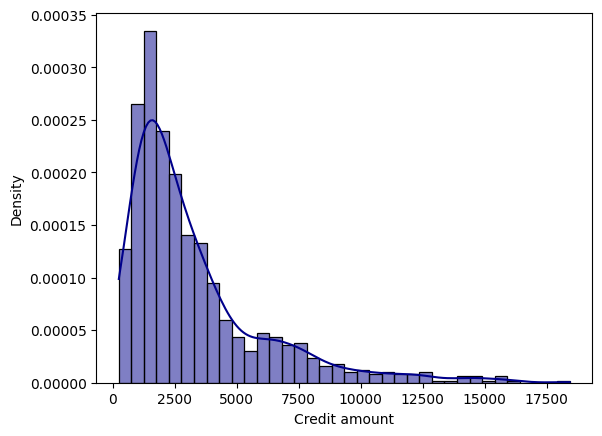

In [72]:
exp.density_plot('Credit amount')


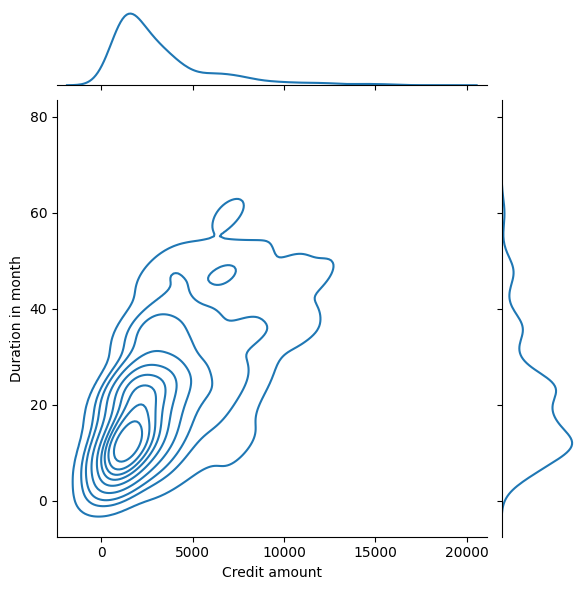

In [73]:
exp.joint_destribution('Credit amount', 'Duration in month')

In [74]:
exp.variable_effect('Credit amount', 0.1, 1)

'-5.233887%'

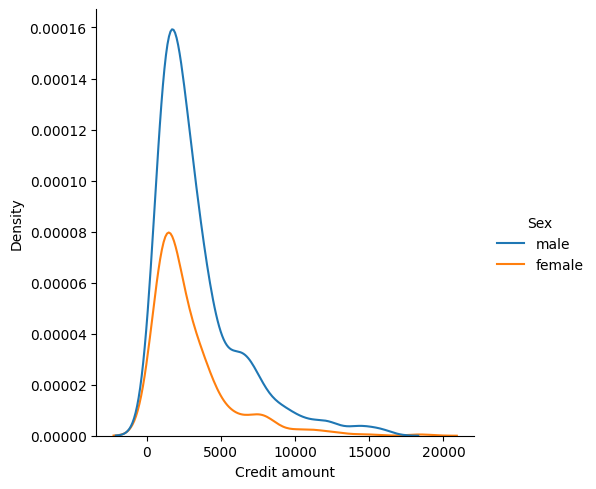

In [75]:
exp.compare_classes('Credit amount')

Metrics for male on cutoff
fpr: 0.533678756476684
tpr: 0.4768611670020121
1-fpr: 0.46632124352331605
tf: 0.010539923478696034
threshold: 0.9988734749227051

Metrics for female on cutoff
fpr: 0.4845360824742268
tpr: 0.5172413793103449
1-fpr: 0.5154639175257731
tf: 0.001777461784571721
threshold: 0.014303334660362155



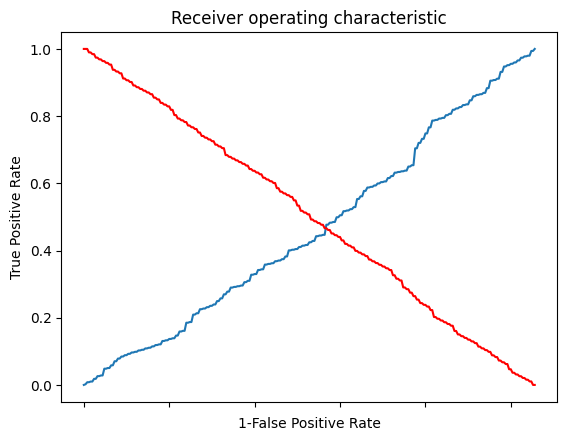

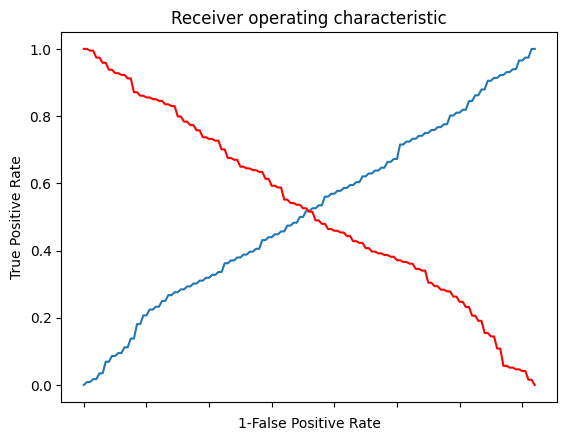

In [76]:
exp.tpr_fpr('Sex')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


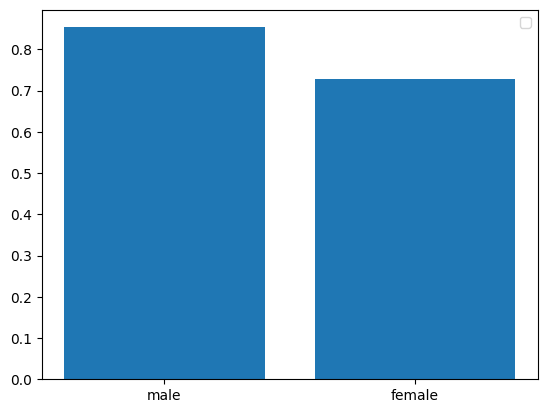

'Процент одобренных среди male = 85.362319%, отклоненных - 14.637681%\nПроцент одобренных среди female = 72.903226%, отклоненных - 27.096774%\n'

In [77]:
exp.accept_percentage('Sex', True)

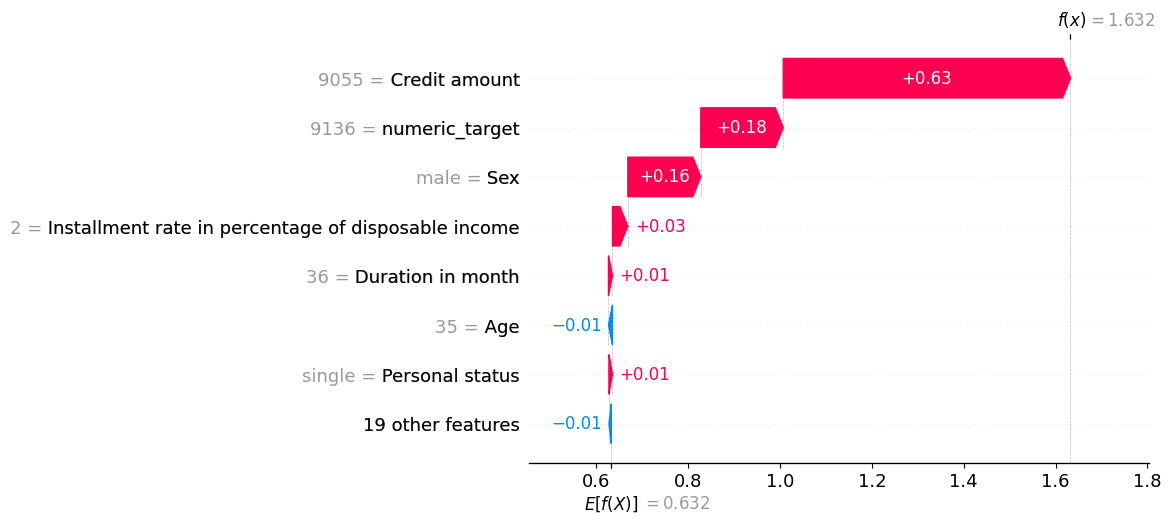

In [78]:
exp.shapper(4)

In [79]:
exp.difference_percentage('Sex', 'cat_target')

'Разница в проценте принятния между female и male составляет -37.36%\nРазница в проценте отклонения между female и male составляет 37.36%\n'

In [80]:
exp.search('cat_target')

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Other debtors / guarantors,Present residence since,...,Number of people being liable to provide maintenance for,Telepthone,Foreign worker,Sex,Personal status,target,numeric_target,cat_target,score,descrete_score
455,no checking account,24,existing credits paid back duly till now,car (used),2679,... < 100 DM,... < 1 year,4,none,1,...,1,"yes, registered under the customers name",no,female,divorced/separated/married,0,2739,1,0.455264,1
632,0 <= ... < 200 DM,15,existing credits paid back duly till now,radio/television,1444,unknown/ no savings account,... < 1 year,4,none,1,...,1,none,no,male,single,0,1489,0,0.067931,1


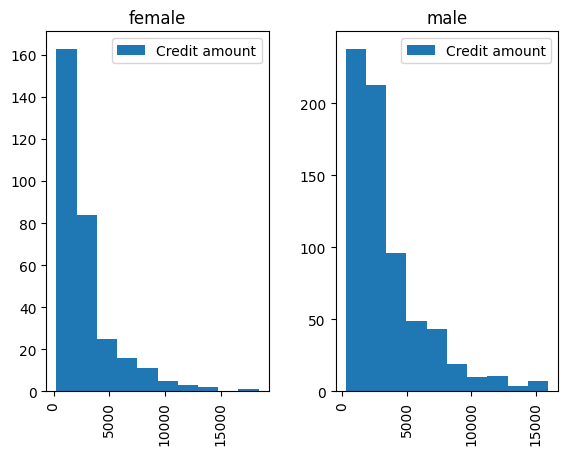

In [81]:
exp.distribution('Credit amount', 'Sex')

In [82]:
exp.result_of_centroid('score')

-0.0005081514989242475

In [83]:
exp.mean_protected('Credit amount', 'Sex')

'Среденее значение колонки Credit amount для класса female = 2877.7741935483873\nСреденее значение колонки Credit amount для класса male = 3448.040579710145\n'

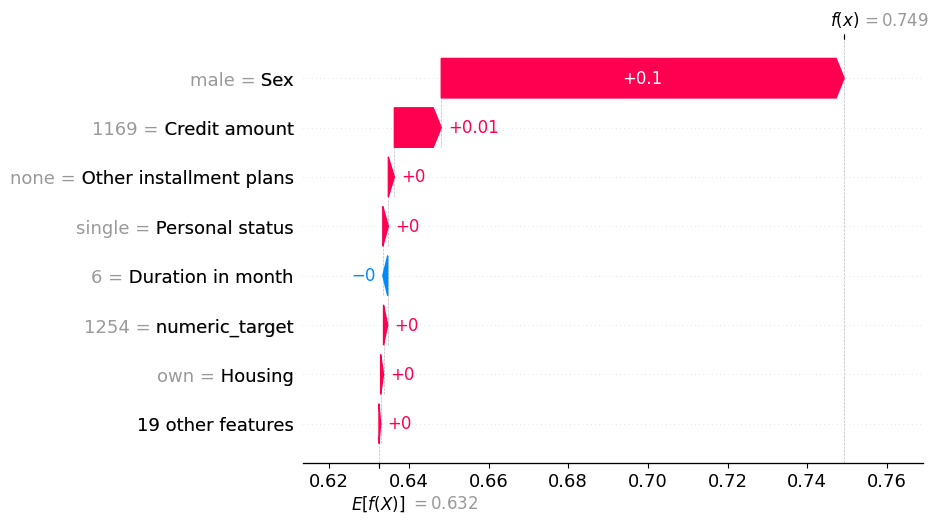

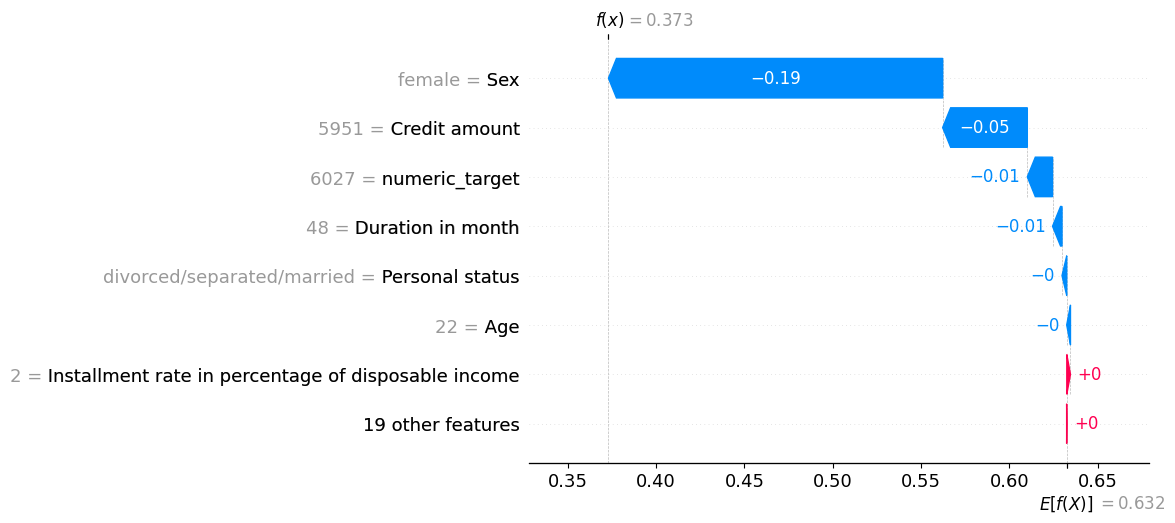

In [84]:
exp.mean_shapper('Sex')

'Среднее значение таргета по классу male = 0.7202898550724638\nСреднее значение таргета по классу female = 0.3741935483870968\n'

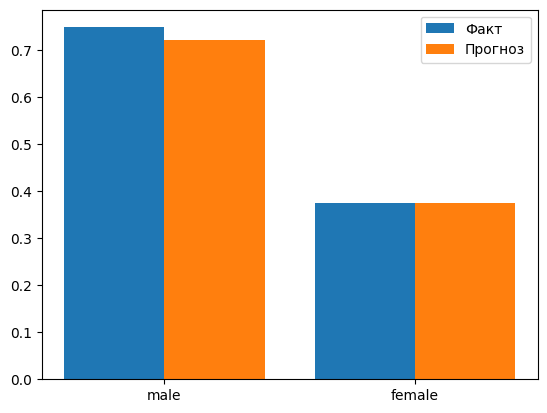

In [85]:
exp.mean_target('Sex', 'target', 'cat_target')

In [86]:
df.to_csv('data.csv')

In [33]:
from dash import Dash, html, dcc, dash_table, Dash, Input, Output, callback
import dash_bootstrap_components as dbc
import plotly.express as px
import pandas as pd

app = Dash(external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = html.Div([
    dash_table.DataTable(df.to_dict('records'),[{"name": i, "id": i} for i in df.columns], id='tbl',
                         style_cell={'textAlign': 'left'},
                         editable=True),
    dbc.Alert(id='tbl_out'),
])

@callback(Output('tbl_out', 'children'), Input('tbl', 'active_cell'))
def update_graphs(active_cell):
    return str(active_cell) if active_cell else "Click the table"

if __name__ == "__main__":
    app.run(debug=True)


In [57]:
from dash import Dash, dcc, html, Input, Output, dash_table, callback, dependencies
from dash.exceptions import PreventUpdate
import dash
from time import sleep
from random import randint, seed



# For the documentation to always render the same values
def generate_table(df, max_rows=100):
    return dash_table.DataTable(
    id = 'data-table',
    data=df.to_dict('records'),
    columns=[{'id': c, 'name': c} for c in df.columns],
    style_cell={'textAlign': 'left',
                'font-family': 'montserrat',
                'textAlign': 'center',
                'border': 'none'},
    editable=True,
#    style_cell_conditional=[
#        {
#            'if': {'column_id': 'Region'},
#            'textAlign': 'center'
#        }
#    ]
)

app = Dash()

app.layout = html.Div(
    children=[
    dcc.Dropdown(
        id='dropdown',
        ## extend the options to consider unique Fund values as well
        options=[{'label': i, 'value': i} for i in list(df.columns)],
        multi=True, placeholder='Select a column',
        style={'backgroundColor': 'white',
               'width': '25em',
               'margin-bottom': '5em',
               'border-radius': '1em'}),
    html.H1(children='Id', style={'font-family': 'montserrat'}),
    html.Div(id='table-container'),
    
])


@app.callback(dash.dependencies.Output('table-container', 'children'),
    [dash.dependencies.Input('dropdown', 'value')])

def display_table(dropdown_value):
    if dropdown_value is None:
        return generate_table(df)

    ## add an 'or' condition for the other column you want to use to slice the df 
    ## and update the columns that are displayed
    dff = pd.DataFrame(df, columns = dropdown_value)
    return generate_table(dff)

if __name__ == '__main__':
    app.run_server(debug=True)

In [89]:
df['score'] = model.predict(df)

In [87]:
import joblib
joblib.dump(model, "model.pkl")

['model.pkl']

In [90]:
model.save_model('model_name') 

In [59]:
from dash import Dash, dcc, html, Input, Output, dash_table, callback, dependencies, State
from dash.exceptions import PreventUpdate
import dash
from time import sleep
from random import randint, seed
import pandas as pd
import dash_bootstrap_components as dbc
import dash_ag_grid as dag

df = pd.read_csv('data.csv')

columnTypes = {
    "idxColumn": {"width": 180, "filter": "agNumberColumnFilter"}
}


defaultColDef = {
    # set the default column width
    "width": 150,
    # make every column editable
    "editable": True
}
columnDefs = [{
    "field": 'Unnamed: 0',
    "type": "idxColumn",
    "headerName": ""
    }]
columnDefs.extend([{"field": i} for i in list(df.columns[1:])])

# For the documentation to always render the same values
def generate_table(df):

    columnDefs = [{
    "field": 'Unnamed: 0',
    "type": "idxColumn",
    "headerName": ""
    }]
    columnDefs.extend([{"field": i} for i in list(df.columns[1:])])
    return [dag.AgGrid(
            columnDefs=columnDefs,
            defaultColDef=defaultColDef,
            rowData=df.to_dict("records"),
            dashGridOptions={
                'columnTypes': columnTypes
            }
        )]

app = Dash(external_stylesheets=[dbc.themes.BOOTSTRAP])

style_txt = {'font-size': '32px', 
             'font-family': 'montserrat', 
             'textAlign': 'center'}

app.layout = html.Div(
    [
        dbc.Row(
            dbc.Col(
                dcc.Dropdown(
                    id='dropdown',
                    options=[{'label': i, 'value': i} for i in list(df.columns)],
                    multi=True, placeholder='Select a column',
                    style={'backgroundColor': 'white',
                        'width': '25em',
                        'border-radius': '1em',
                        'margin-bottom': '3em',
                        'margin-top': '3em',
                        'margin-left': '1em'}
                ), style={'allign': 'left'}
            )
        ),
        dbc.Row(
            [
                dbc.Col(
                    html.Div('Id'), 
                    width={"size": 1, "order": 1},
                    style=style_txt
                ),
                dbc.Col(
                    html.Div('Features'),
                    width={"order": 2, "offset": 2},
                    style=style_txt
                ),
                dbc.Col(
                    html.Div('Score'),
                    width={"order": 3, "offset": 2},
                    style=style_txt
                ),
                dbc.Col(
                    html.Div('Prediction'),
                    width={"order": 4},
                    style=style_txt
                ),
                dbc.Col(
                    html.Div('Actual'),
                    width={"order": 5},
                    style=style_txt
                )
            ], 
            style={
                'margin-left': '3em',
                'margin-right': '3em'
            }
        ),
        dbc.Row(
            
                html.Div(
                    id = 'table-container',
                    children =
                        [
                            dag.AgGrid(
                                id ='editing-grid2',
                                columnDefs=columnDefs,
                                defaultColDef=defaultColDef,
                                rowData=df.to_dict("records"),
                                dashGridOptions={
                                    'columnTypes': columnTypes
                                },
                                persistence=True,
                            )
                        ]
                )
            
        ),
            dbc.Button('Submit', size='sm', id='btn', n_clicks=0)
        
    ]
)

@app.callback(
    Output("editing-grid2", "rowData"),
    [Input('btn', 'n_clicks'),
    State("editing-grid2", "cellValueChanged"),
    State("editing-grid2", "rowData")])

def update(n, cell_val, row_data):
    
    print(n)
    dff = pd.DataFrame(row_data)
    if n:
        return dff.to_dict("records")
    else: 
        return dff.to_dict("records")

@app.callback(dash.dependencies.Output('table-container', 'children'),
    [dash.dependencies.Input('dropdown', 'value')])

def display_table(dropdown_value):
    if dropdown_value is None:
        return generate_table(df)
    if 'Unnamed: 0' not in dropdown_value:
        dropdown_value.insert(0, 'Unnamed: 0')
    ## add an 'or' condition for the other column you want to use to slice the df 
    ## and update the columns that are displayed
    dff = pd.DataFrame(df, columns = dropdown_value)
    return generate_table(dff)

if __name__ == '__main__':
    app.run_server(debug=True, port=8081)

Address already in use
Port 8081 is in use by another program. Either identify and stop that program, or start the server with a different port.


AttributeError: 'tuple' object has no attribute 'tb_frame'